<a href="https://colab.research.google.com/github/priscilaxrc/TCCUSPMonkeyPox/blob/main/USP_21_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho TCC USP

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip3 install -U git+https://github.com/PYFTS/pyFTS
#!pip3 install -U pyFTS
!pip3 install SimpSOM
!pip install dispy
#!pip install matplotlib==3.1.3
!pip install matplotlib==3.1.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/PYFTS/pyFTS to /tmp/pip-req-build-32q5b4sr
  Running command git clone --filter=blob:none --quiet https://github.com/PYFTS/pyFTS /tmp/pip-req-build-32q5b4sr
  Resolved https://github.com/PYFTS/pyFTS to commit 4c77ecc73fa0888132ac3996ca7e1f519dcf2fc8
  Preparing metadata (setup.py) ... done
  Created wheel for pyFTS: filename=pyFTS-1.7-py3-none-any.whl size=217871 sha256=ad840cea8136b8d40b39d7666dc4d4548651739be218d13c7508dc8c7db647c8
  Stored in directory: /tmp/pip-ephem-wheel-cache-m4jsk1lw/wheels/7f/25/75/dd8f713bf48592da71e0441c7abdc1f5aa4d9645a6b7ee99d4
Successfully built pyFTS
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 427.9/427.9 kB 9.6 MB/s eta 0:00:00
  In

In [3]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
from pyFTS.models import hofts
from pyFTS.partitioners import Grid
from pyFTS.benchmarks import Measures

In [4]:
from pyFTS.data import TAIEX, Malaysia, sunspots, artificial
from statsmodels.tsa.stattools import acf, pacf

datasets = {}

#dff = pd.read_excel('../content/drive/MyDrive/DadosPWFTS/DadosFalha.xlsx')
dff = pd.read_csv('../content/drive/MyDrive/TCCPriscila/Teste_Daily_Country_Wise_Confirmed_Cases.csv', ';')

#dfn = pd.read_excel('../content/drive/MyDrive/DadosPWFTS/DadosNormais.xlsx')
#dfn = pd.read_csv('../content/drive/MyDrive/TCCPriscila/Teste_Daily_Country_Wise_Confirmed_Cases.csv', ';')

dados = dff[0:112] 
#dados_teste_Falha = dff[0:112]

In [5]:
print(dados)#print dados
dados2=dados.T

                      Country  23/05/2022  24/05/2022  25/05/2022  26/05/2022  \
0                     Nigeria           0           0           0           0   
1                    Cameroon           0           0           0           0   
2    Central African Republic           0           0           0           0   
3           Republic of Congo           0           0           0           0   
4                     England          36          14           7          24   
..                        ...         ...         ...         ...         ...   
107                    Jordan           0           0           0           0   
108                      Guam           0           0           0           0   
109                   Ukraine           0           0           0           0   
110                   Bahrain           0           0           0           0   
111                     China           0           0           0           0   

     27/05/2022  28/05/2022

In [6]:
teste1 = dados2[8]
teste11 = teste1[1:]
teste2 = dados2[7]
teste22 = teste2[1:]
teste3 = dados2[4]
teste33 = teste3[1:]
teste4 = dados2[12]
teste44 = teste4[1:]
teste5 = dados2[38]
teste55 = teste4[1:]

In [7]:
#Dados
from statsmodels.tsa.stattools import acf, pacf

datasets1 = {}

datasets1['EUA'] = teste11
datasets1['Spain'] = teste22
datasets1['UK'] = teste33
datasets1['France'] = teste44
datasets1['Brazil'] = teste55

print(datasets1)

{'EUA': 23/05/2022      0
24/05/2022      2
25/05/2022      2
26/05/2022      5
27/05/2022      4
             ... 
18/09/2022      0
19/09/2022    391
20/09/2022    311
21/09/2022    157
22/09/2022    205
Name: 8, Length: 123, dtype: object, 'Spain': 23/05/2022     1
24/05/2022     4
25/05/2022     8
26/05/2022    25
27/05/2022    21
              ..
18/09/2022     0
19/09/2022     0
20/09/2022    46
21/09/2022     0
22/09/2022     0
Name: 7, Length: 123, dtype: object, 'UK': 23/05/2022    36
24/05/2022    14
25/05/2022     7
26/05/2022    24
27/05/2022     0
              ..
18/09/2022     0
19/09/2022     0
20/09/2022    29
21/09/2022     0
22/09/2022     0
Name: 4, Length: 123, dtype: object, 'France': 23/05/2022    10
24/05/2022     0
25/05/2022     0
26/05/2022    11
27/05/2022     0
              ..
18/09/2022     0
19/09/2022     0
20/09/2022    18
21/09/2022     8
22/09/2022     0
Name: 12, Length: 123, dtype: object, 'Brazil': 23/05/2022    10
24/05/2022     0
25/05/2022     

## Training procedure

### Definition of the Universe of Discourse U & Linguistic variable creation

The Universe of Discourse (U) partitioners are responsible for identifying U, split the partitions and create their fuzzy sets. There are several ways to partition U and this has a direct impact on the accuracy of the predictive model.

For this example we are using grid partitioning, where all sets are equal. The default membership function is triangular.

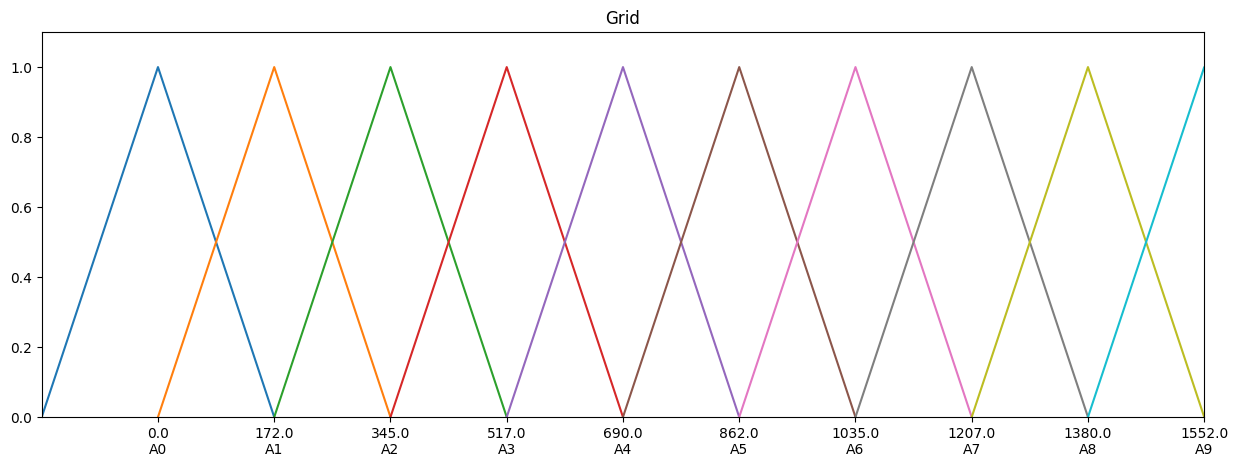

In [8]:
from pyFTS.partitioners import Grid

data = datasets1['EUA']

data1 = data[:100]

fs = Grid.GridPartitioner(data=data1,npart=10)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15,5])

fs.plot(ax)

In [9]:
print(data1)

23/05/2022      0
24/05/2022      2
25/05/2022      2
26/05/2022      5
27/05/2022      4
             ... 
26/08/2022    499
27/08/2022      0
28/08/2022      0
29/08/2022    650
30/08/2022    312
Name: 8, Length: 100, dtype: object


### Fuzzyfication

This is demo-only, and you do not need to explicitly run it. This entire process runs automatically within the fit function, which trains the model.

In [12]:
fuzzyfied = fs.fuzzyfy(data1.values, method='maximum', mode='sets')

fuzzyfied

['A0',
 'A0',
 'A0',
 'A0',
 'A0',
 'A0',
 'A0',
 'A0',
 'A0',
 'A0',
 'A0',
 'A0',
 'A0',
 'A0',
 'A0',
 'A0',
 'A0',
 'A0',
 'A0',
 'A0',
 'A0',
 'A0',
 'A0',
 'A0',
 'A0',
 'A0',
 'A0',
 'A0',
 'A0',
 'A0',
 'A0',
 'A0',
 'A0',
 'A0',
 'A0',
 'A0',
 'A0',
 'A0',
 'A0',
 'A0',
 'A0',
 'A0',
 'A0',
 'A1',
 'A0',
 'A1',
 'A0',
 'A0',
 'A0',
 'A1',
 'A0',
 'A1',
 'A1',
 'A2',
 'A0',
 'A0',
 'A1',
 'A1',
 'A1',
 'A1',
 'A2',
 'A0',
 'A0',
 'A3',
 'A2',
 'A5',
 'A2',
 'A2',
 'A0',
 'A0',
 'A4',
 'A3',
 'A2',
 'A3',
 'A2',
 'A0',
 'A0',
 'A8',
 'A3',
 'A5',
 'A2',
 'A2',
 'A0',
 'A0',
 'A4',
 'A5',
 'A5',
 'A3',
 'A0',
 'A0',
 'A0',
 'A8',
 'A3',
 'A4',
 'A2',
 'A3',
 'A0',
 'A0',
 'A4',
 'A2']